# Loan Prediction

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Importing & Loading the dataset

In [2]:
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.shape

(614, 13)

In [5]:
df.describe() #statistical summary

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### First we will fill the Missing Values in "LoanAmount" & "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [9]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())


In [10]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

#### Now, Let's drop all the missing values remaining.

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

# Exploratory Data Analyis(EDA):

## Comparison between Genders in getting the Loan:

Loan_Status    N    Y
Gender               
Female        33   65
Male         133  311


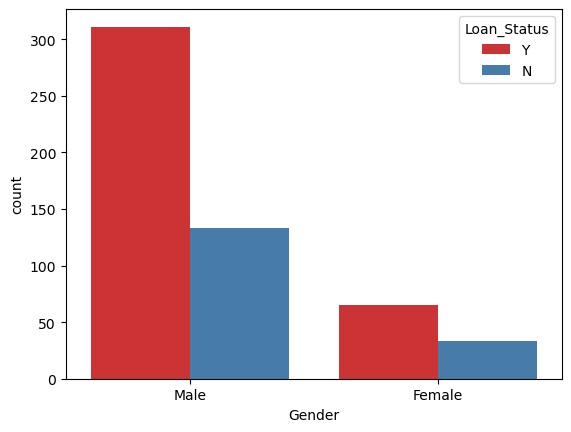

In [14]:
sns.countplot(df['Gender'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Gender'],df['Loan_Status']))

#### Here, we can see that the Males have more chances to get the Loan.

## Comparison between Married Status in getting the Loan:

Loan_Status   N    Y
Married             
No           70  117
Yes          96  259


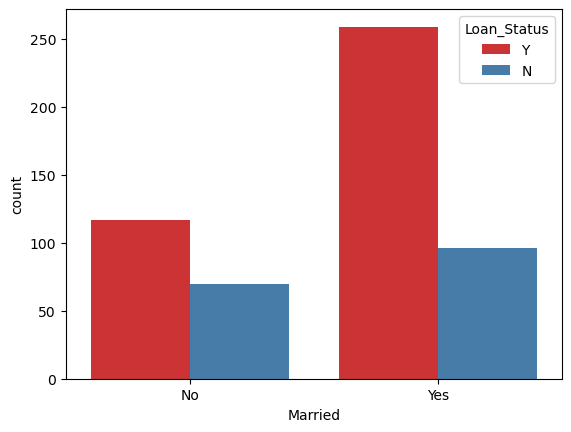

In [15]:
sns.countplot(df['Married'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Married'],df['Loan_Status']))

#### Here, we can see that the Married Person has more chance of getting the Loan.

## Comparison between Education Status of an Individual in getting the Loan:

Loan_Status     N    Y
Education             
Graduate      122  303
Not Graduate   44   73


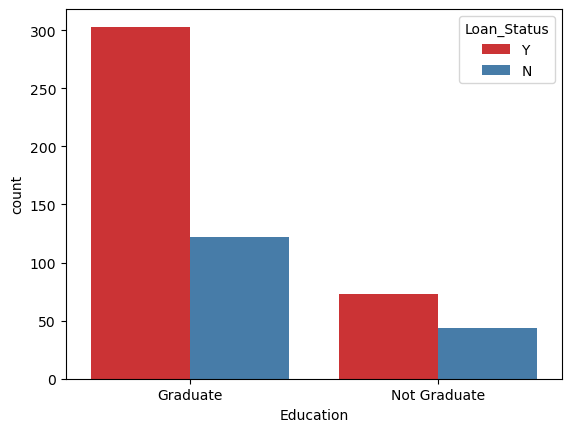

In [16]:
sns.countplot(df['Education'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Education'],df['Loan_Status']))

#### Here, we can see that a Graduate Individual has more chance of getting the Loan.

## Comparison between Self-Employed or Not in getting the Loan:

Loan_Status      N    Y
Self_Employed          
No             141  326
Yes             25   50


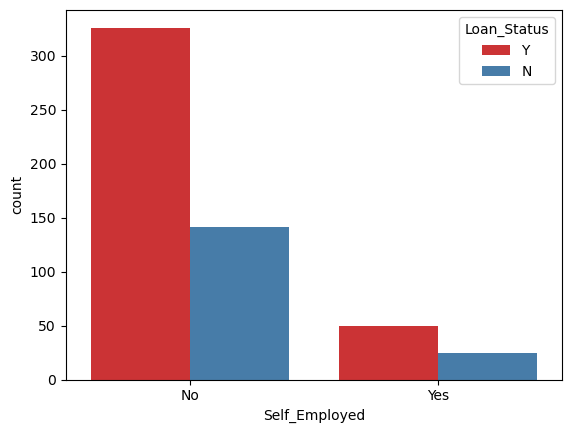

In [17]:
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Self_Employed'],df['Loan_Status']))

#### Here, we can see that Not Self-Employed has more chance of getting the Loan.

## Comparison between Property Area for getting the Loan:

Loan_Status     N    Y
Property_Area         
Rural          61   98
Semiurban      47  162
Urban          58  116


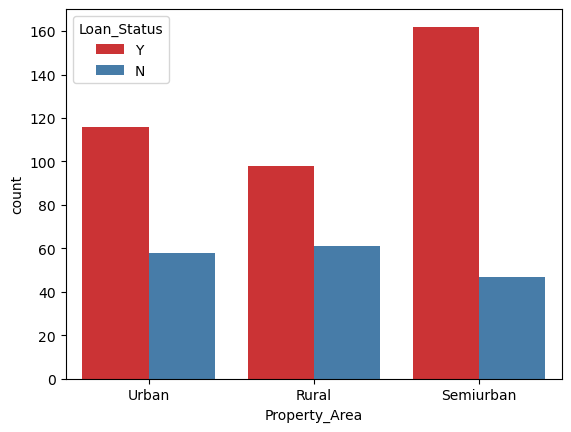

In [21]:
sns.countplot(df['Property_Area'],hue=df['Loan_Status'],palette='Set1')
print(pd.crosstab(df['Property_Area'],df['Loan_Status']))

#### Here, we can see that People living in Semi-Urban Area have more chance to get the Loan.

## Let's replace the Variable values to Numerical form & display the Value Counts

#### The data in Numerical form avoids disturbances in building the model.

In [22]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)


In [23]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [24]:

df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [25]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [26]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [27]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [28]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [29]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [30]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [31]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

# Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix (for Loan Status)')

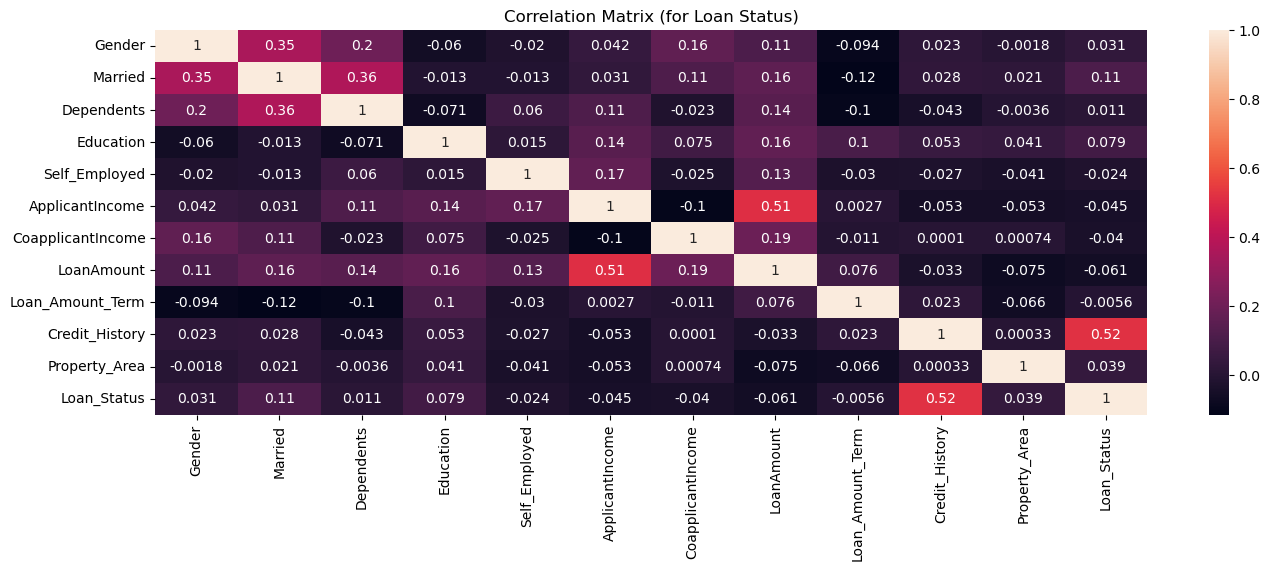

In [33]:
plt.figure(figsize=(16,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix (for Loan Status)')

#### From the above figure, we can see that Credit_History (Independent Variable) has the maximum correlation with Loan_Status (Dependent Variable). Which denotes that the Loan_Status is heavily dependent on the Credit_History.

In [34]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


#### Splitting the data into Train and Test 

In [35]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print(X_train)

[[  1.   1.   3. ... 360.   1.   0.]
 [  1.   1.   2. ... 180.   1.   2.]
 [  1.   1.   1. ... 360.   1.   1.]
 ...
 [  1.   1.   2. ... 360.   1.   2.]
 [  1.   1.   3. ... 360.   0.   0.]
 [  0.   1.   2. ... 360.   1.   1.]]


In [37]:
print(X_test)

[[  0.   1.   2. ... 360.   1.   2.]
 [  1.   1.   2. ... 360.   0.   0.]
 [  1.   0.   0. ... 360.   0.   0.]
 ...
 [  1.   0.   0. ... 360.   1.   1.]
 [  1.   1.   0. ... 360.   1.   1.]
 [  1.   1.   3. ... 360.   0.   1.]]


In [38]:
print(y_train)

[1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1
 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 0 0 1 1 1 1 0 1]


# Modelling

In [39]:
model = LogisticRegression()
model.fit(X_train,y_train)

lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7852760736196319


In [42]:
from sklearn import svm
model = svm.SVC()
model.fit(X_train,y_train)

svc_prediction = model.predict(X_test)
print('SVM accuracy = ', metrics.accuracy_score(svc_prediction,y_test))


SVM accuracy =  0.6503067484662577


In [43]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

dt_prediction = model.predict(X_test)
print('Decision Tree accuracy = ', metrics.accuracy_score(dt_prediction,y_test))


Decision Tree accuracy =  0.7055214723926381


In [46]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)

knn_prediction = model.predict(X_test)
print('KNN accuracy = ', metrics.accuracy_score(knn_prediction,y_test))


KNN accuracy =  0.6196319018404908


# CONCLUSION:

#### 1. The Loan Status is heavily dependent on the Credit History for Predictions.

#### 2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification Algorithms.